# Shopify Fall 2021 Data Science Intern Challenge

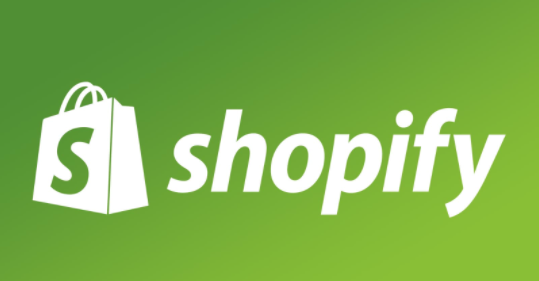

In [386]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

## Question 1: 

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**Think about what could be going wrong with our calculation.**

1. Think about a better way to evaluate this data.
2. What metric would you report for this dataset?
3. What is its value?


## Exploratory Data Analysis

In [387]:
#The dataset
shopify = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")
shopify.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [388]:
#Checking the column and rows numbers
shopify.shape

(5000, 7)

In [389]:
#Descriptive statistics of the dataset
shopify.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


From the table above, we see that the value $3145.13 is obtained from calculating the sum of all "order_amount" and dividing that value by the total number of orders (5000 orders in our case). This amount corresponds to the mean in the table above which is obtained the same way. 

From the same table we see that the standard deviation (spread in the data points) is quite high for "order_amount" and "total_items" columns in comparison to the other columns. This already clues us in on some the variance in those two columns and this requires subsequent investigation. Furthermore, we also see that the maximum values for order_amount and total_items are 704,000 and 2000 respectively - significantly higher values compared to the 75th percentile values for the same columns thus indicating the presence of outliers. 

### Average Order Value (AOV) = Revenue / Number of Orders

### This is the reported AOV value is it is obtained using the AOV formula as shown above.

In [390]:
#A sanity check calculation - showing how the value $3145.128 is obtained
Average_Order = sum(shopify.order_amount)/5000
Average_Order

3145.128

In [391]:
#Checking the dtypes of all the columns
shopify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [392]:
#Checking for any null values - presence of null values would interfere with analysis
shopify.isnull().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [393]:
#Converting the date column to datetime 
shopify["Date"] = pd.to_datetime(shopify["created_at"])
shopify.drop(["created_at"], axis = 1, inplace = True)

In [394]:
#Checking the min and max date to ensure that data is only for 1 month 
#Data is from March 1st 2017 to March 30th 2017.
shopify["Date"].min()

Timestamp('2017-03-01 00:08:09')

In [395]:
shopify["Date"].max()

Timestamp('2017-03-30 23:55:35')

In [396]:
#Checking to make sure there are 100 sneaker shops in the data

length = shopify["shop_id"].unique()
len(length)

100

In [397]:
#Making sure there are no duplicate order_ids
total_orderid_unique = shopify["order_id"].unique()
len(total_orderid_unique)

5000

In [398]:
total_orderid = shopify["order_id"]
len(total_orderid)

5000

## Calculating AOV for each of the individual 100 shoe shops

In [399]:
#Calculate the total revenue generated at each shoe store
#Grouping ny the shop id and calculationg total revenue for each store

AOV_totals = shopify.groupby(["shop_id"])[["order_amount"]].sum()
AOV_totals.head()

,order_amount
shop_id,
1,13588
2,9588
3,14652
4,13184
5,13064


In [400]:
#Calculating total number of orders per shoe store

AOV_count = pd.DataFrame(shopify['order_id'].groupby(shopify['shop_id']).count())
AOV_count.head()

,order_id
shop_id,
1,44
2,55
3,48
4,51
5,45


In [401]:
#Merging the two tables above on the common shop_id
#This table gives us the total amount of individual revenue generated at each of the shoe stores along with the number of orders at each store.

final_AOV = AOV_totals.merge(AOV_count, how = "inner", on = "shop_id")
final_AOV.head()

,order_amount,order_id
shop_id,,
1,13588,44
2,9588,55
3,14652,48
4,13184,51
5,13064,45


In [402]:
#Adding another column (AOV) with the calculated AOV's for each individual store.
final_AOV["AOV"] = final_AOV["order_amount"]/final_AOV["order_id"]
final_AOV.head()

,order_amount,order_id,AOV
shop_id,,,
1,13588,44,308.818182
2,9588,55,174.327273
3,14652,48,305.250000
4,13184,51,258.509804
5,13064,45,290.311111


In [403]:
#Reset the index and sort AOV values from smallest to largest
final_AOV = final_AOV.sort_values(by =["AOV"]).reset_index()
final_AOV

,shop_id,order_amount,order_id,AOV
0,92,6840,42,162.857143
1,2,9588,55,174.327273
2,32,7979,42,189.976190
3,100,8547,40,213.675000
4,53,14560,68,214.117647
...,...,...,...,...
95,38,13680,35,390.857143
96,90,19758,49,403.224490
97,50,17756,44,403.545455
98,78,2263800,46,49213.043478


### Final table containing AOV for each individual shop

In [415]:
#Changing columns names for ease of understanding

final_AOV.rename({"order_id":"total_orders"}, axis = "columns", inplace=True)
final_AOV.head()

,shop_id,order_amount,total_orders,AOV
0,92,6840,42,162.857143
1,2,9588,55,174.327273
2,32,7979,42,189.976190
3,100,8547,40,213.675000
4,53,14560,68,214.117647


### Checking the outliers 

In [416]:
#Checking all values above AOV 400 
#400 was decided upon because the 75th percentile value is $390 for the order_amount column

high_400 = final_AOV[final_AOV["AOV"] >= 400]
high_400

,shop_id,order_amount,total_orders,AOV
96,90,19758,49,403.224490
97,50,17756,44,403.545455
98,78,2263800,46,49213.043478
99,42,11990176,51,235101.490196


In [417]:
#Checking all values above AOV 500 

high_500 = final_AOV[final_AOV["AOV"] >= 500]
high_500

,shop_id,order_amount,total_orders,AOV
98,78,2263800,46,49213.043478
99,42,11990176,51,235101.490196


From the analysis above we see two shops (shop id 42 and 78) that have values way higher than AOV 500. We will analysis this further.

### Creating a separate table without the outliers for visualization purposes

In [407]:
#Removing store 42 and store 78 from the data
remove_outliers = final[(final.shop_id != 42) & (final.shop_id != 78)]
remove_outliers.head()

,index,shop_id,order_amount,order_id,AOV
0,0,1,13588,44,308.818182
1,1,2,9588,55,174.327273
2,2,3,14652,48,305.250000
3,3,4,13184,51,258.509804
4,4,5,13064,45,290.311111


In [408]:
#The average AOV value 98 stores (2 outlier stores removed)
remove_outliers["AOV"].mean()

299.6823991261549

### Data Visualiation of the results

In [409]:
#From the box plot of all AOV values

fig = px.box(final_AOV, y="AOV", title = "Boxplot to show AOV of all shoe shops")
fig.show()

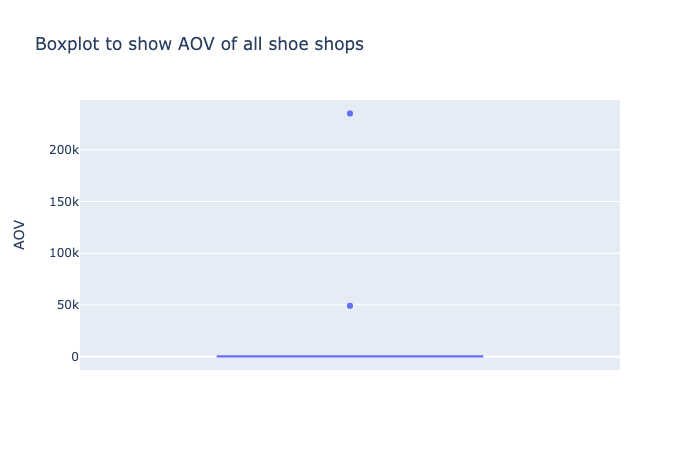

From the boxplot above **(or lack thereof)** we see the presence of significant outliers in the AOV values of two shoe shops such that the scale of the box-plot is also distorted to accomodate these outliers. **This visual is important as it shows the magnitude of the outliers.** These outliers will be investigated in further detail.

In [419]:
#Scatter plot to show outliers
fig = px.scatter(final_AOV, x="order_amount", y="total_orders", title = "Scatterplot to show outliers")
fig.show()

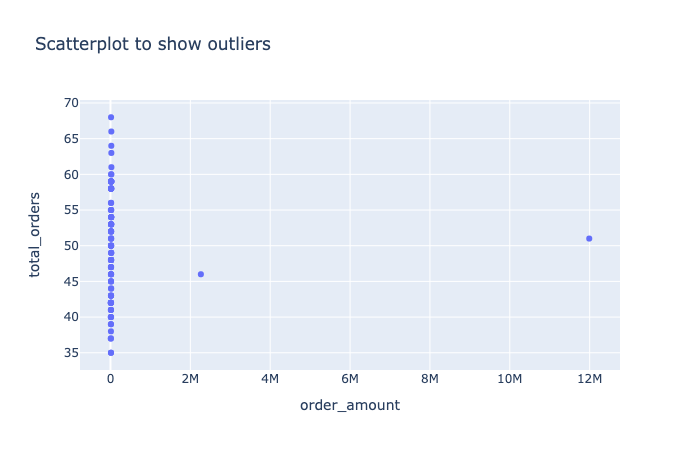

From the scatterplot above, we see that there are 2 stores containing significantly higher revenue generated from orders compared to all the other stores. From the scatterplot we also see that the quantity of orders between the two outlying stores does not differ drastically however, the revenue generated by the two stores differs significantly. 

In [420]:
#Histogram to show outliers

fig = px.histogram(final, x="AOV", nbins=5, title = "Histogram to show outliers")
fig.show()

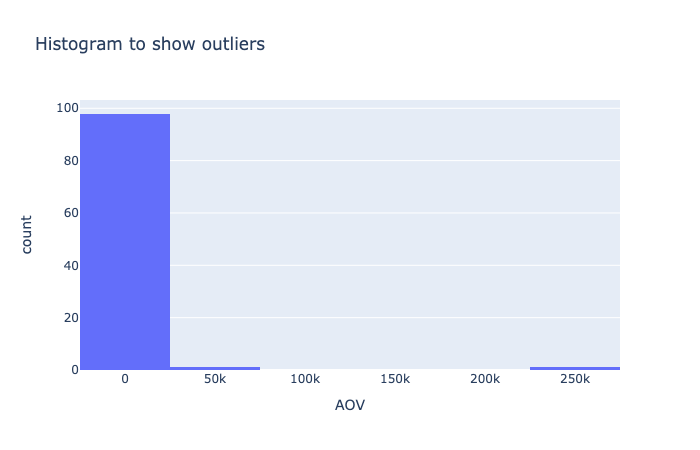

**From the visuals above, we get a clear indication of the two outlier shops skewing (right-skew) the AOV value.** 

In [421]:
fig = px.box(remove_outliers, y="AOV", title = "Boxplot of AOV with outlier shops removed")
fig.show()

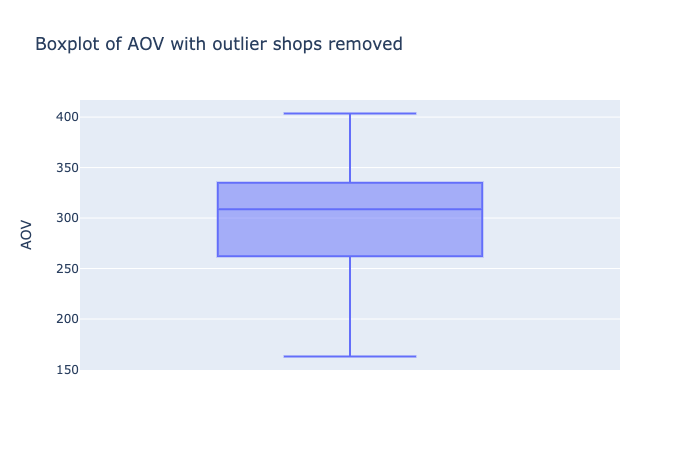

In the boxplot above, the outliers have been first removed and the boxplot subsequently plotted. **From this visualization, we see that 98 out of the 100 shoes stores have an AOV value that mostly falls approximately between 262 and 334 with the median value being 308. These values seem more reasonable in the context of sneakers. This also confirms that it is the two outlier shops (not included in this boxplot) that is driving the AOV to be comparatively large.**

### Further investigation of shops 42 and 78 (outlier shoe shops)
### Shop 42:

In [422]:
#Visual inspection of shop 42 data

shop_42 = shopify[shopify["shop_id"] == 42]
shop_42

,order_id,shop_id,user_id,order_amount,total_items,payment_method,Date
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
40,41,42,793,352,1,credit_card,2017-03-24 14:15:41
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
308,309,42,770,352,1,credit_card,2017-03-11 18:14:39
409,410,42,904,704,2,credit_card,2017-03-04 14:32:58
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
834,835,42,792,352,1,cash,2017-03-25 21:31:25
835,836,42,819,704,2,cash,2017-03-09 14:15:15
938,939,42,808,1056,3,credit_card,2017-03-13 23:43:45
979,980,42,744,352,1,debit,2017-03-12 13:09:04


### Multiple shoe orders for 2,000 shoes per order, valued at $704,000 in total.

**Looking closely at the data from shop 42 indicates that there is significant variance in terms of the total items bought per order. We see a significant number of orders with 2000 pairs of shoes bought per order and so numerous orders values at 704,000 (2000 X 352 dollars). So whereas the cost of an individual pair of shoe is still valued at 352 dollars at shop 42, the number of orders that each contain 2000 pairs of shoes bought at once is significantly higher compared to other stores. Including the AOV of this store to the AOV of the other stores is driving the total AOV to be profoundly higher as the average value is highly influences by outlier values**

The fact that we see multiple orders each amounting to exactly 704,000 and 2000 orders at shop 42 requires that we investigate this further to ensure there was no error in data entry.

In [423]:
#Average order value for shop 42 is $235,101 compared to approximately $300 for the other shoe shops

orders_shop42 = len(shop_42.order_id)
avg_ordervalue_42 = sum(shop_42.order_amount)/orders_shop42
avg_ordervalue_42

235101.49019607843

In [424]:
#descriptive statistics of the all the data except the two outliers - shop 42 and shop 78
remove_outliers.describe()

,index,shop_id,order_amount,order_id,AOV
count,98.000000,98.000000,98.000000,98.000000,98.000000
mean,49.306122,50.306122,15016.979592,50.030612,299.682399
std,29.162329,29.162329,3469.426421,7.350509,50.896733
min,0.000000,1.000000,6840.000000,35.000000,162.857143
25%,24.250000,25.250000,12803.500000,44.250000,262.661218
50%,49.500000,50.500000,14763.000000,50.000000,308.827696
75%,73.750000,74.750000,17478.000000,55.000000,334.631226
max,99.000000,100.000000,23128.000000,68.000000,403.545455


**The AOV for shop 42 (as shown in the calculation above) is 235,101 dollars compared to the other 98 stores (that are not outliers) and have an AOV of approximately 300 dollars. This is a significant difference and shows us the discrepancy in AOV values between the shops.**

### Shop 78:

In [425]:
shop_78 = shopify[shopify["shop_id"] == 78]
shop_78

,order_id,shop_id,user_id,order_amount,total_items,payment_method,Date
160,161,78,990,25725,1,credit_card,2017-03-12 05:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
511,512,78,967,51450,2,cash,2017-03-09 07:23:14
617,618,78,760,51450,2,cash,2017-03-18 11:18:42
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21
1259,1260,78,775,77175,3,credit_card,2017-03-27 09:27:20


### Price of each pair of shoes sold at shop 78 is $25,725 (significantly more expensive than at other shoe stores) 

In [426]:
#Average order value for shop 78
orders_shop78 = len(shop_78.order_id)
avg_ordervalue_78 = sum(shop_78.order_amount)/orders_shop78
avg_ordervalue_78

49213.04347826087

**The AOV for shop 78 is 49,213 dollars. This is less than the AOV for shop 42 (at 235,101 dollars) however it is still significantly higher than the other 98 shoe shops (300 dollars).**

#### Conclusion: From further investigating shop 42 and shop 78, the following differences are notable:

#### Shop 42 has each pair of shoes priced at 352 dollars but sells more pairs of shoes per order (if the data is correct). There are multiple orders for 2000 shoes and each of these order are valued at 704,000 dollars (2000*352). Thus, shop 42 has an AOV value of 235,101 dollars.

#### Shop 72 in comparison has more expensive shoes (each pair is worth 25,725 dollars) however, fewer shoes are bought per order in comparison to shop 42. The AOV at shop 72 is 49,213.

#### The AOV at the other 98 stores is approximately 300 dollars. 


### Total count of shoes sold at the stores

In [427]:
#Calculating the mean number of shoes sold in the 98 shoe stores (shoe stores that do not have any outlying values)
#Groupy by shop id and get the sum of shoes sold at each store
#An average of 99 pairs of shoes sold at each of the other stores
shopify_remove_outliers = shopify[(shopify.shop_id != 42) & (shopify.shop_id != 78)]
shoes_sold = shopify_remove_outliers.groupby("shop_id")["total_items"].sum().reset_index()
shoes_sold.columns = ["shop_id", "shoes sold"]
shoes_sold.mean()

shop_id       50.306122
shoes sold    99.846939
dtype: float64

In [428]:
#Calculating the totla number of shoes sold at store 42 (34,063 pairs)
shop_42.total_items.sum()

34063

In [429]:
#Calculating the total number of shoe sold at store 78 (88 pairs)
shop_78.total_items.sum()

88

### The price of shoes at the rest of the stores

In [430]:
#Get the average price of a pair of shoe at each of the other 98 store

avg_shoe_price = sum(shopify_remove_outliers["order_amount"])/sum(shopify_remove_outliers["total_items"])
avg_shoe_price


150.4

In [431]:
# The price of each shoe at shop 42

avg_shoe_price_shop42 = sum(shop_42["order_amount"])/sum(shop_42["total_items"])
avg_shoe_price_shop42


352.0

In [432]:
# The price of each shoe at shop 78

avg_shoe_price_shop78 = sum(shop_78["order_amount"])/sum(shop_78["total_items"])
avg_shoe_price_shop78


25725.0

# Summary of main differences between the shoe shops

In [433]:
#Create dataframe to show differences in the AOV, Shoes sold and price per pair between shop 42, 78 and all the other stores
data = [["Store 42", 235101, 34063, 352], ["Store 78", 49213, 88, 25725], ["All other stores", 300, 100, 150]]
summary = pd.DataFrame(data, columns = ["Store", "AOV", "Shoes Sold", "Price per pair"])

In [434]:
#Highlighting maximum values
summary_1 = summary.style.highlight_max(color = 'yellow', axis = 0)
summary_1


,Store,AOV,Shoes Sold,Price per pair
0,Store 42,235101,34063,352
1,Store 78,49213,88,25725
2,All other stores,300,100,150


**The table above shows the significant differences between the different shops and their respective values (AOV, number of shoes sold and price per pair) that have the most variance and hence causing the skewed AOV value of 3145.13.** 

Please note: The values for "All other stores" are the average values of the 98 other stores that do not have outlying values.

# Alternatives metrics

### 1. Report AOV for each shoe shop individually

Reporting the AOV for each store individually not only allows us to make the necessary comparisons between the stops but also prevents the outlying values from skewing the AOV value. The table containing the AOV store for each store is  shown below:

In [435]:
#The AOV of each store reported individually
final_AOV

,shop_id,order_amount,total_orders,AOV
0,92,6840,42,162.857143
1,2,9588,55,174.327273
2,32,7979,42,189.976190
3,100,8547,40,213.675000
4,53,14560,68,214.117647
...,...,...,...,...
95,38,13680,35,390.857143
96,90,19758,49,403.224490
97,50,17756,44,403.545455
98,78,2263800,46,49213.043478


### 2. Average all the other shops and report store 42 and 78 separately

We can report the average AOV value for the 98 shoe stores and report the AOV values for store 42 and store 78 separately as shown below

In [436]:
#Create dataframe to show differences in the AOV shop 42, 78 and all the other stores
data_AOV = [["Store 42", 235101], ["Store 78", 49213], ["All other stores", 300]]
AOV_summary = pd.DataFrame(data_AOV, columns = ["Store", "AOV"])
AOV_summary

,Store,AOV
0,Store 42,235101
1,Store 78,49213
2,All other stores,300


### 3. Report the median AOV value of all the shops

The median is a more robust value in the presence of outliers. Whereas the mean is easily influenced by the outliers, the median value is not and hence the median AOV value for all the shoe shops can be calculated and reported as shown below.

In [437]:
#The median AOV value for all the shops
final_AOV["AOV"].median()

308.8897584973166

# Question 2: SQL

For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

a. How many orders were shipped by Speedy Express in total?

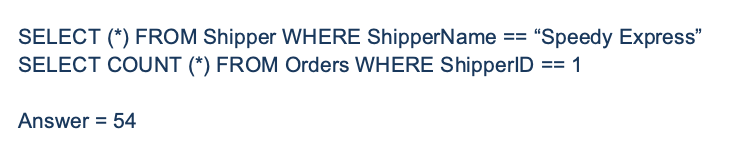


b. What is the last name of the employee with the most orders?


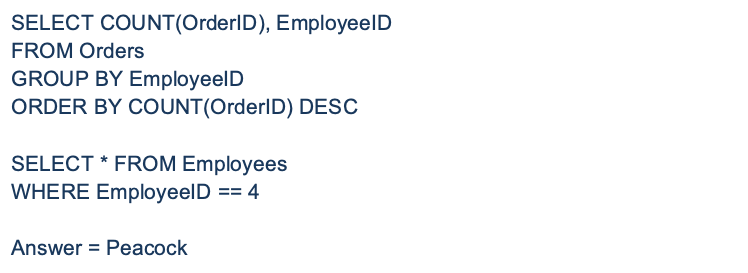



c. What product was ordered the most by customers in Germany?

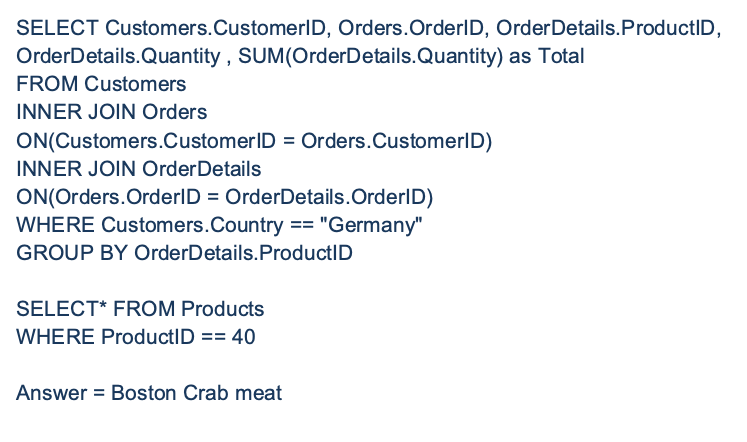
